<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.606276,31.363493,74.385079,-0.229986,159.124863,159.368150,-0.243287
1,0.0,1.0,76.521318,77.815231,32.726030,-0.193445,196.869134,196.919349,-0.050215
2,0.0,2.0,69.835416,95.973882,38.317338,-0.293712,213.832924,213.946784,-0.113861
3,0.0,3.0,39.836102,60.479470,81.302208,0.062265,191.680045,191.561477,0.118568
4,0.0,4.0,35.850005,65.687050,81.725014,0.137748,193.399817,193.199177,0.200640
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.418632,46.695465,88.526546,0.644391,242.285035,241.730768,0.554267
59996,999.0,56.0,21.704879,35.056771,47.654100,-0.574247,113.841504,114.273266,-0.431762
59997,999.0,57.0,68.043161,78.660058,28.137032,-1.199318,183.640932,184.760976,-1.120044
59998,999.0,58.0,58.600289,70.232517,48.043372,-0.123915,186.752263,186.779690,-0.027427


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.606276  31.363493  74.385079  ...  159.124863  159.368150 -0.243287
      1.0    76.521318  77.815231  32.726030  ...  196.869134  196.919349 -0.050215
      2.0    69.835416  95.973882  38.317338  ...  213.832924  213.946784 -0.113861
      3.0    39.836102  60.479470  81.302208  ...  191.680045  191.561477  0.118568
      4.0    35.850005  65.687050  81.725014  ...  193.399817  193.199177  0.200640
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   96.418632  46.695465  88.526546  ...  242.285035  241.730768  0.554267
      56.0   21.704879  35.056771  47.654100  ...  113.841504  114.273266 -0.431762
      57.0   68.043161  78.660058  28.137032  ...  183.640932  184.760976 -1.120044
      58.0   58.600289  70.232517  48.043372  ...  186.752263  186.779690 -0.027427
      59.0   86.295484  99.431508  36.707417  ...  232.423721  232.367866  0.055855

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.606276  31.363493  74.385079  ...  159.124863  159.368150 -0.243287
      1.0    76.521318  77.815231  32.726030  ...  196.869134  196.919349 -0.050215
      2.0    69.835416  95.973882  38.317338  ...  213.832924  213.946784 -0.113861
      3.0    39.836102  60.479470  81.302208  ...  191.680045  191.561477  0.118568
      4.0    35.850005  65.687050  81.725014  ...  193.399817  193.199177  0.200640
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   96.418632  46.695465  88.526546  ...  242.285035  241.730768  0.554267
      56.0   21.704879  35.056771  47.654100  ...  113.841504  114.273266 -0.431762
      57.0   68.043161  78.660058  28.137032  ...  183.640932  184.760976 -1.120044
      58.0   58.600289  70.232517  48.043372  ...  186.752263  186.779690 -0.027427
      59.0   86.295484  99.431508  36.707417  ...  232.423721  232.367866  0.055855

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.606276,31.363493,74.385079,-0.229986,159.124863,159.368150,-0.243287
1,0.0,1.0,76.521318,77.815231,32.726030,-0.193445,196.869134,196.919349,-0.050215
2,0.0,2.0,69.835416,95.973882,38.317338,-0.293712,213.832924,213.946784,-0.113861
3,0.0,3.0,39.836102,60.479470,81.302208,0.062265,191.680045,191.561477,0.118568
4,0.0,4.0,35.850005,65.687050,81.725014,0.137748,193.399817,193.199177,0.200640
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,96.418632,46.695465,88.526546,0.644391,242.285035,241.730768,0.554267
59996,999.0,56.0,21.704879,35.056771,47.654100,-0.574247,113.841504,114.273266,-0.431762
59997,999.0,57.0,68.043161,78.660058,28.137032,-1.199318,183.640932,184.760976,-1.120044
59998,999.0,58.0,58.600289,70.232517,48.043372,-0.123915,186.752263,186.779690,-0.027427


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.606276  31.363493  74.385079  ...  159.124863  159.368150 -0.243287
      1.0    76.521318  77.815231  32.726030  ...  196.869134  196.919349 -0.050215
      2.0    69.835416  95.973882  38.317338  ...  213.832924  213.946784 -0.113861
      3.0    39.836102  60.479470  81.302208  ...  191.680045  191.561477  0.118568
      4.0    35.850005  65.687050  81.725014  ...  193.399817  193.199177  0.200640
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   96.418632  46.695465  88.526546  ...  242.285035  241.730768  0.554267
      56.0   21.704879  35.056771  47.654100  ...  113.841504  114.273266 -0.431762
      57.0   68.043161  78.660058  28.137032  ...  183.640932  184.760976 -1.120044
      58.0   58.600289  70.232517  48.043372  ...  186.752263  186.779690 -0.027427
      59.0   86.295484  99.431508  36.707417  ...  232.423721  232.367866  0.055855

[60000 rows x 7 columns]

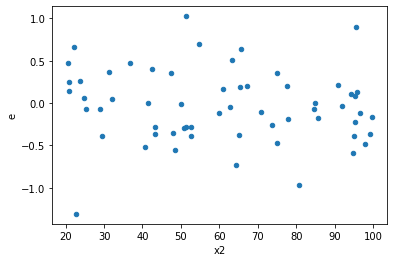

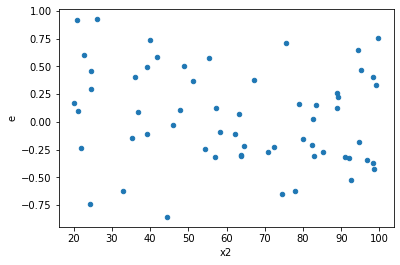

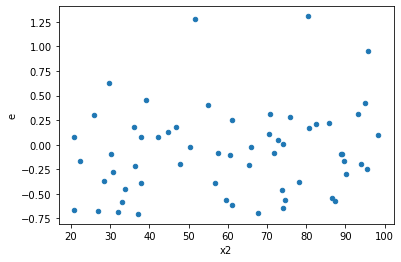

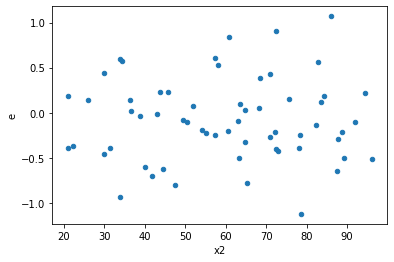

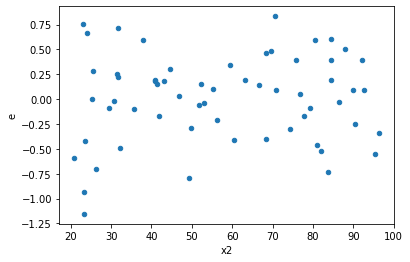

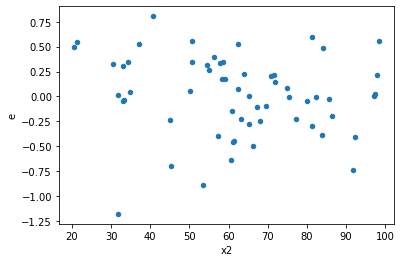

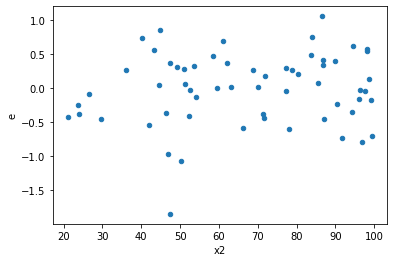

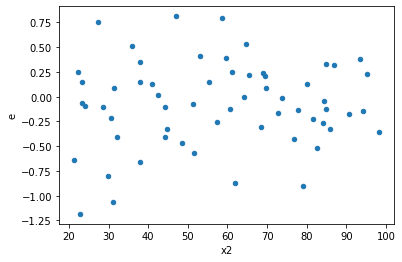

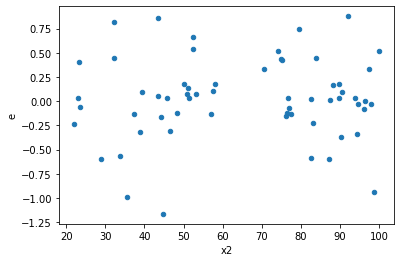

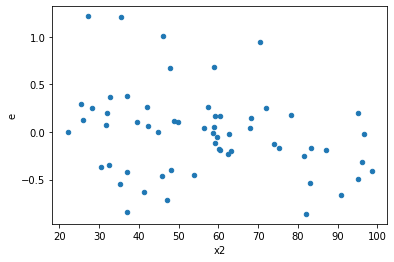

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,24.0,30.0,2.1797173162333348,5.877369894329933,0.09082155484305561,0.19591232981099777,2.157112704682765,0.04713567375344385,0.9764321631232781,0.023567836876721926,Reject005=0 : Heteroscedasticity
4.0,26.0,28.0,2.6460038498999103,7.899347199846342,0.10176937884230425,0.2821195428516551,2.7721456695614766,0.009603857080517253,0.9951980714597414,0.0048019285402586265,Reject005=0 : Heteroscedasticity
5.0,19.0,35.0,2.6602567044172902,7.198830408147036,0.14001351075880475,0.20568086880420103,1.4690072957210438,0.3170192639240845,0.8414903680379577,0.15850963196204226,Reject005=1 : Homoscedasticity
6.0,30.0,24.0,5.982451537067466,5.748592834948362,0.1994150512355822,0.23952470145618177,1.2011365239086962,0.6509115376971486,0.6745442311514257,0.3254557688485743,Reject005=1 : Homoscedasticity
8.0,23.0,31.0,5.144420727516085,7.6955677114355385,0.22367046641374283,0.24824411972372704,1.1098654359871016,0.7754251139726862,0.6122874430136569,0.3877125569863431,Reject005=1 : Homoscedasticity
14.0,28.0,26.0,3.1491498192142147,6.375849096531377,0.11246963640050767,0.24522496525120682,2.180365946751651,0.04919080680205079,0.9754045965989746,0.024595403401025395,Reject005=0 : Heteroscedasticity
15.0,26.0,28.0,3.6957302557158256,4.662571575946591,0.1421434713736856,0.16652041342666396,1.1714953336751783,0.6802504965392844,0.6598747517303578,0.3401252482696422,Reject005=1 : Homoscedasticity
16.0,26.0,28.0,4.91028241812341,8.302158726445,0.18885701608166963,0.29650566880160717,1.5700008130668854,0.2446371931285265,0.8776814034357368,0.12231859656426325,Reject005=1 : Homoscedasticity
17.0,28.0,26.0,4.53956712703268,4.738880551688351,0.1621273973940243,0.18226463660339812,1.1242062694711217,0.7671669691704599,0.61641651541477,0.38358348458522995,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,28.0,5.426933128181279,4.317018654383186,0.2087281972377415,0.15417923765654235,0.738660323314785,0.44039507504235104,Reject005=1 : Homoscedasticity
1.0,24.0,30.0,2.1797173162333348,5.877369894329933,0.09082155484305561,0.19591232981099777,2.157112704682765,0.04713567375344385,Reject005=0 : Heteroscedasticity
2.0,31.0,23.0,6.5978964191086815,3.096045063742218,0.21283536835834457,0.13461065494531382,0.6324637487819875,0.23259872477651336,Reject005=1 : Homoscedasticity
3.0,29.0,25.0,4.643807390729397,3.686174378603941,0.16013128933549645,0.14744697514415764,0.9207880343437224,0.8246179641606339,Reject005=1 : Homoscedasticity
4.0,26.0,28.0,2.6460038498999103,7.899347199846342,0.10176937884230425,0.2821195428516551,2.7721456695614766,0.009603857080517253,Reject005=0 : Heteroscedasticity
5.0,19.0,35.0,2.6602567044172902,7.198830408147036,0.14001351075880475,0.20568086880420103,1.4690072957210438,0.3170192639240845,Reject005=1 : Homoscedasticity
6.0,30.0,24.0,5.982451537067466,5.748592834948362,0.1994150512355822,0.23952470145618177,1.2011365239086962,0.6509115376971486,Reject005=1 : Homoscedasticity
7.0,23.0,31.0,6.6653719771668705,7.4589156418264455,0.2897987816159509,0.24061018199440146,0.8302663684530754,0.6514976408385478,Reject005=1 : Homoscedasticity
8.0,23.0,31.0,5.144420727516085,7.6955677114355385,0.22367046641374283,0.24824411972372704,1.1098654359871016,0.7754251139726862,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      905
Reject005=0 : Heteroscedasticity     95
Name: Result_test, dtype: int64